<a href="https://colab.research.google.com/github/VictorLC28/Investigaci-n-de-Operaciones-I/blob/main/Programaci%C3%B3n%20Lineal%20con%20Scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SOLUCIÓN DE PROBLEMAS LIBRERÍA Scipy
El objetivo es encontrar la solción del siguiente problema de programación lineal por medio de la libreria Scipy.

**Porblema:** Maximizar $$z=4x_1+x_2$$ \\
Sujeto a: \\
$$3x_1+x_2=3$$
$$4x_1+3x_2 \geq 6$$
$$x_1+2x_2 \leq 4$$
$$x_1,x_2 \geq 0$$


In [1]:
from scipy.optimize import linprog #Llamamos la biblioteca y función que vamos a utilizar.

Lo primero que debemos hacer es declarar nuestros vectores, de forma que podamos reescribir nuestro problema de optimización a uno de la forma:

**Maximizar:** $$z=cx$$ \\
Sujeto a:
$$A_1x \leq b_1$$
$$A_2x \geq b_2$$
$$A_3x = b_3$$
Con $$x_i \geq 0 \; \forall \; i \in \{1, \cdots, n \}$$

Así, nuestro problema se define de forma general como:
  
**Optimizar:** $$z=c_1x_1+c_2x_2+...c_nx_n$$ \\
Sujeto a:
$$ a_{1,1}x_{1}+a_{1,2}x_{2}+...+a_{1,n}x_{n} \leq b_{1}\\ $$
$$\vdots$$
$$ a_{i,1}x_{1}+a_{i,2}x_{2}+...+a_{i,n}x_{n} \leq b_{i}\\ $$
$$ a_{i+1,1}x_{1}+a_{i+1,2}x_{2}+...+a_{i+1,n}x_{n} \geq b_{i+1}\\ $$
$$\vdots$$
$$ a_{i+k,1}x_{1}+a_{i+1,2}x_{2}+...+a_{i+k,n}x_{n} \geq b_{i+k}\\ $$
$$ a_{i+k+1,1}x_{1}+a_{i+k+1,2}x_{2}+...+a_{i+k+1,n}x_{n} = b_{i+k+1}\\ $$
$$\vdots$$
$$ a_{i+k+l,1}x_{1}+a_{m,2}x_{2}+...+a_{i+k+l,n}x_{n} = b_{i+k+l}\\ $$

Donde $i+k+l=m$, con $i,k,l,m,n \in \mathbb{N}$
Entonces tenemos que, para poder reescribirlo de forma correcta, definimos a nuestraz matrices $A_1, A_2,A_3$ como:
$$A_1= \begin{bmatrix}
a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
\vdots & \vdots & \vdots & \vdots \\
a_{i,1} & a_{i,2} & \cdots & a_{i,n} \\
\end{bmatrix}; \; A_2= \begin{bmatrix}
a_{i+1,1} & a_{i+1,2} & \cdots & a_{i+1,n} \\
a_{i+2,1} & a_{i+2,2} & \cdots & a_{i+2,n} \\
\vdots & \vdots & \vdots & \vdots \\
a_{i+k,1} & a_{i+k,2} & \cdots & a_{i+k,n} \\
\end{bmatrix}; \; A_3= \begin{bmatrix}
a_{i+k+1,1} & a_{i+k+1,2} & \cdots & a_{i+k+1,n} \\
a_{i+k+2,1} & a_{i+k+2,2} & \cdots & a_{i+k+2,n} \\
\vdots & \vdots & \vdots & \vdots \\
a_{m,1} & a_{m,2} & \cdots & a_{m,n} \\
\end{bmatrix}
$$
Definimos a nuestros vectores $b_1, b_2, b_3$ como:
$$b_1= \begin{bmatrix}
b_{1}  \\
b_{2}  \\
\vdots  \\
b_{i}  \\
\end{bmatrix}; \; b_2= \begin{bmatrix}
b_{i+1}  \\
b_{i+2}  \\
\vdots  \\
b_{i+k}  \\
\end{bmatrix}; \; b_3= \begin{bmatrix}
b_{i+k+1}  \\
b_{i+k+2}  \\
\vdots  \\
b_{m}  \\
\end{bmatrix} $$
A nuestro vector $c$ como:
$$c= [c_{1}, c_{2}, \cdots, c_{n}]$$
y a nuestro vector de varaibles $x$ como:
$$x= \begin{bmatrix}
x_{1}  \\
x_{2}  \\
\vdots  \\
x_{n}  \\
\end{bmatrix}
$$

En el caso de nuestro problema definimos a nuestros vectores de la siguiente forma: \\
$$c=[4,1] \quad \text{y} \quad x=[x_1,x_2]$$
A nuestras matrices, las definimos de la forma:
$$A_1= \begin{bmatrix}
3 & 1 \\
0 & 0 \\
0 & 0 \\
\end{bmatrix}; \; A_2= \begin{bmatrix}
0 & 0 \\
4 & 3 \\
0 & 0 \\
\end{bmatrix}; \; A_3= \begin{bmatrix}
0 & 0 \\
0 & 0 \\
1 & 2 \\
\end{bmatrix} $$
A los vectores restricción como:
$$b_1=\begin{bmatrix}
3  \\
0  \\
0  \\
\end{bmatrix}; \; b_2=\begin{bmatrix}
0  \\
6  \\
0  \\
\end{bmatrix}; \; b_1=\begin{bmatrix}
0  \\
0  \\
4  \\
\end{bmatrix}$$
Con esto podemos reescribir nuestro problema de la forma deseada, ahora, de esta manera podemos incorporarlos dentro de nuestro metodo de solución por media de la impleemtación en la libreria Scipy:


In [2]:
#Lo primero es declarar a nuestros respectivos vectores:
c = [-4 , -1] #En el caso de que busquemos optmizar nuestros valores del vector c se multiplican por -1.

In [12]:
#Para ingresar una matriz de hace como un arreglo de arreglos.
A1 = [[3, 1], [0, 0], [0, 0]]
A2 = [[0, 0], [-4, -3], [1, 2]] # Juntamos A2 y A3 puesto que la funcion a usar solo admite desigualdades menor igual, esto se consigue invirtiendo la mayor igual.

In [11]:
b1 = [3, 0, 0]
b2 = [0, -6, 4]# Juntamos b2 y b3 puesto que la funcion a usar solo admite desigualdades menor igual, esto se consigue invirtiendo la mayor igual.

In [7]:
#en lugar de declarar un vector x, declaramos variable por variable, en nuestro caso 2.
x1_bounds = (0, None)
x2_bounds = (0, None)

In [14]:
#Una vez declarados todos nuestro vectores, implementamos nuestra función de optimización:
model_linear = linprog(c, A_ub=A2, b_ub=b2, A_eq=A1, b_eq=b1, bounds=[x1_bounds, x2_bounds])

In [15]:
#Imprimimos nuestro resultado:
print(model_linear)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -3.5999999999999996
              x: [ 6.000e-01  1.200e+00]
            nit: 0
          lower:  residual: [ 6.000e-01  1.200e+00]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: [ 0.000e+00  0.000e+00  0.000e+00]
                 marginals: [-1.600e+00 -0.000e+00 -0.000e+00]
        ineqlin:  residual: [ 0.000e+00  0.000e+00  1.000e+00]
                 marginals: [-0.000e+00 -2.000e-01 -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0


In [72]:
print(model_linear.fun) #De esta forma obtenemos la solución optima del problema.

-3.5999999999999996


In [19]:
print(model_linear.x) # De esta forma solo se imprime el vector solución del problema.

[0.6 1.2]


Si lo buscamos resolver de forma gráfica tenemos lo siguiente:

In [67]:
import sympy as sp
sp.init_printing()

In [21]:
x=sp.symbols('x')
y=sp.Function('y')

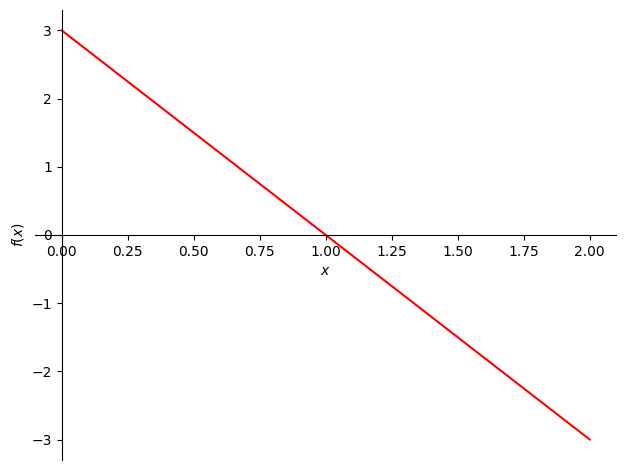

In [59]:
c1 = sp.plotting.plot(3 - 3*x, (x, 0, 2), line_color='red', )

In [49]:
from sympy import plot_implicit, symbols, Eq, And

In [41]:
x,y=symbols('x y')

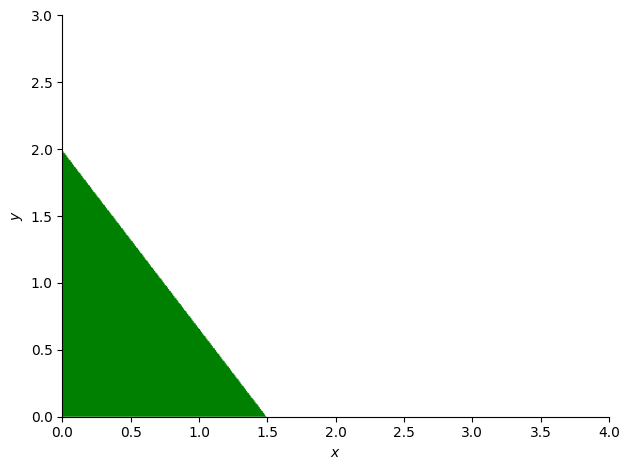

In [69]:
c3 = plot_implicit(And((y < 2-x/2), (y < (6-4*x)*1/3)), (x, 0 , 4), (y, 0, 3), line_color='green')

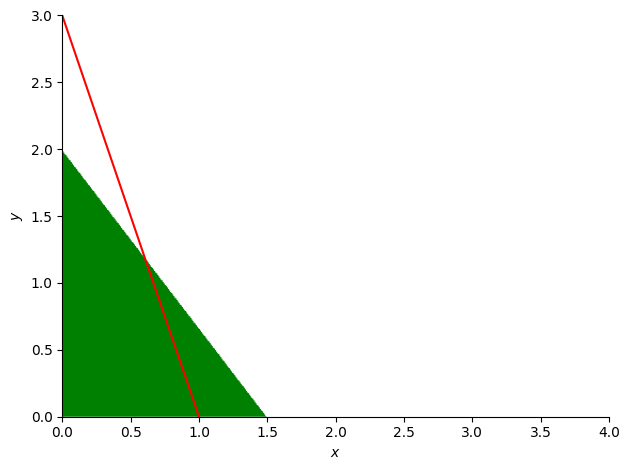

In [70]:
c3.append(c1[0])
c3.show()